In [2]:
# IMPORT MODULES
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec

### Terminus Position 

In [ ]:
# Calculate the monthly mean terminus position anomaly as a percentage, relative to April 2016
terminus_data = pd.read_csv(r"R:/KOGE_BUGT/github/data/MaQiT_terminus_position_change/koge_bugt_C_maqit_output_2015_2024.csv", skiprows=1, parse_dates={"Date": ["Year", "Month", "Day"]})
terminus_data['Date'] = pd.to_datetime(terminus_data['Date'])
terminus_data = terminus_data[(terminus_data['Date'] >= '2016-01-01') & (terminus_data['Date'] <= '2023-12-31')] # Extract data between 2016 and 2024
terminus_data['Month'] = terminus_data['Date'].dt.month # Extract month from date
terminus_data['Year'] = terminus_data['Date'].dt.year # Extract year from date
terminus_data = terminus_data.drop_duplicates(subset=['Year', 'Month']) # Drop duplicates
terminus_monthly = terminus_data.groupby(['Year', 'Month']).mean(numeric_only=True).reset_index() # Calculate monthly mean terminus position
baseline_terminus_position = terminus_monthly.loc[(terminus_monthly['Year'] == 2016) & (terminus_monthly['Month'] == 4), 'Terminus Position on flowline'].values[0] # Get the baseline terminus position (April 2016)
terminus_monthly['Terminus_Position_Anomaly'] = terminus_monthly['Terminus Position on flowline'] - baseline_terminus_position # Calculate the terminus position anomaly
terminus_monthly['Terminus_Position_Anomaly_Percent'] = (terminus_monthly['Terminus_Position_Anomaly'] / baseline_terminus_position) * 100 # Calculate the terminus position anomaly as a percentage

### Ice Discharge 

In [ ]:
# Calculate the monthly mean ice discharge anomaly as a percentage, relative to April 2016
discharge_data = pd.read_csv('R:/KOGE_BUGT/github/data/mankoff_2020_ice_discharge/koge_bugt_C_ice_discharge.csv')
discharge_data['Date'] = pd.to_datetime(discharge_data['Date'])
discharge_data = discharge_data[(discharge_data['Date'] >= '2016-01-01') & (discharge_data['Date'] <= '2023-12-31')] # Extract data between 2016 and 2024
discharge_data['Month'] = discharge_data['Date'].dt.month # Extract month from date
discharge_data['Year'] = discharge_data['Date'].dt.year # Extract year from date
discharge_data = discharge_data.drop_duplicates(subset=['Year', 'Month']) # Drop duplicates
discharge_monthly = discharge_data.groupby(['Year', 'Month']).mean(numeric_only=True).reset_index() # Calculate monthly mean discharge
baseline_discharge = discharge_monthly.loc[(discharge_monthly['Year'] == 2016) & (discharge_monthly['Month'] == 4), 'Discharge'].values[0] # Define the baseline discharge (April 2016)
discharge_monthly['Discharge_Anomaly'] = discharge_monthly['Discharge'] - baseline_discharge # Calculate the discharge anomaly
discharge_monthly['Discharge_Anomaly_Percent'] = (discharge_monthly['Discharge_Anomaly'] / baseline_discharge) * 100 # Calculate the discharge anomaly as a percentage

### Ice Velocity 

In [ ]:
# Calculate the monthly mean ice velocity anomaly as a percentage, relative to April 2016
velocity_data = pd.read_csv(r"R:/KOGE_BUGT/github/data/ITS_LIVE_velocity_fahnestock_widget/koge_bugt_central/lat_65.17116504_lon_-41.15385223.csv", parse_dates=['mid_date'], dayfirst=True)
velocity_data['Date'] = pd.to_datetime(velocity_data['mid_date'], format='%d/%m/%Y')
velocity_data = velocity_data[(velocity_data['Date'] >= '2016-01-01') & (velocity_data['Date'] <= '2023-12-31')] # Extract data between 2016 and 2024
velocity_data['Month'] = velocity_data['Date'].dt.month # Extract month from date
velocity_data['Year'] = velocity_data['Date'].dt.year # Extract year from date
velocity_monthly = velocity_data.groupby(['Year', 'Month']).mean(numeric_only=True).reset_index() # Calculate monthly mean velocity
baseline_velocity = velocity_monthly.loc[(velocity_monthly['Year'] == 2016) & (velocity_monthly['Month'] == 4), ' v [m/yr]'].values[0] # Define the baseline velocity (April 2016)
velocity_monthly['Velocity_Anomaly'] = velocity_monthly[' v [m/yr]'] - baseline_velocity # Calculate the velocity anomaly
velocity_monthly['Velocity_Anomaly_Percent'] = (velocity_monthly['Velocity_Anomaly'] / baseline_velocity) * 100 # Calculate the velocity anomaly as a percentage

## Figure S2

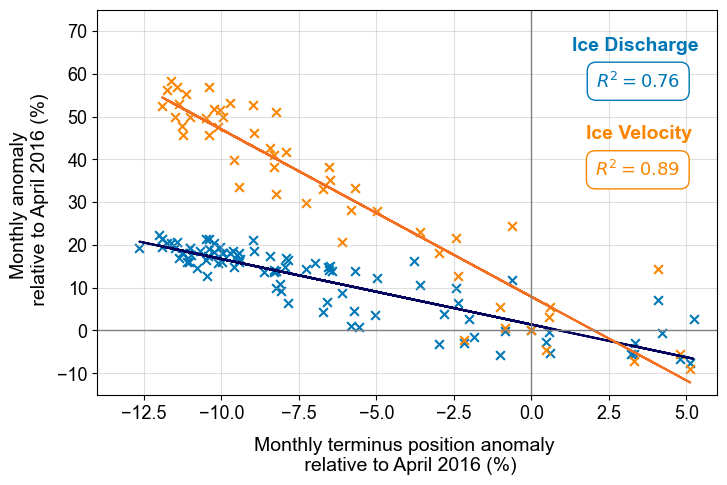

In [ ]:
# Perform linear regression on terminus position and ice discharge anomalies
merged_df_discharge = pd.merge(terminus_monthly, discharge_monthly, on=['Year', 'Month']) 
slope_discharge, intercept_discharge, r_value_discharge, p_value_discharge, std_err_discharge = stats.linregress(
    merged_df_discharge['Terminus_Position_Anomaly_Percent'], merged_df_discharge['Discharge_Anomaly_Percent']) 

# Perform linear regression on terminus position and ice velocity anomalies
merged_df_velocity = pd.merge(terminus_monthly, velocity_monthly, on=['Year', 'Month'])
slope_velocity, intercept_velocity, r_value_velocity, p_value_velocity, std_err_velocity = stats.linregress(
    merged_df_velocity['Terminus_Position_Anomaly_Percent'], merged_df_velocity['Velocity_Anomaly_Percent'])

plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(8, 5))
plt.scatter(merged_df_discharge['Terminus_Position_Anomaly_Percent'], merged_df_discharge['Discharge_Anomaly_Percent'], color='#0077b6', marker='x', s=40, label='Discharge Data points')
plt.plot(merged_df_discharge['Terminus_Position_Anomaly_Percent'], intercept_discharge + slope_discharge * merged_df_discharge['Terminus_Position_Anomaly_Percent'], color='#03045e', linewidth=1.5, label='Discharge Fitted line')
plt.scatter(merged_df_velocity['Terminus_Position_Anomaly_Percent'], merged_df_velocity['Velocity_Anomaly_Percent'], color='#fb8500', marker='x', s=40, label='Velocity Data points')
plt.plot(merged_df_velocity['Terminus_Position_Anomaly_Percent'], intercept_velocity + slope_velocity * merged_df_velocity['Terminus_Position_Anomaly_Percent'], color='#f37022', linewidth=1.5, label='Velocity Fitted line')
plt.xlabel('Monthly terminus position anomaly \n relative to April 2016 (%)', fontsize=14, labelpad=10)
plt.ylabel('Monthly anomaly \n relative to April 2016 (%)', fontsize=14, labelpad=6)
plt.ylim(-15, 75)
plt.xlim(-14, 6)
plt.grid(axis='x', linestyle='-', alpha=0.4)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.tick_params(axis='y', labelsize=13)
plt.tick_params(axis='x', labelsize=13)
plt.axhline(0, color='grey', linewidth=1)
plt.axvline(0, color='grey', linewidth=1)

    # Add R-squared values to the plot
r_squared_text_discharge = f"$R^2 = {r_value_discharge**2:.2f}$"
plt.text(0.97, 0.93, 'Ice Discharge', transform=plt.gca().transAxes, fontsize=14, color='#0077b6', fontweight='bold', verticalalignment='top', horizontalalignment='right')
plt.text(0.94, 0.84, r_squared_text_discharge, transform=plt.gca().transAxes, fontsize=13, color='#0077b6', fontweight='bold',
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', edgecolor='#0077b6', boxstyle='round,pad=0.5'))

r_squared_text_velocity = f"$R^2 = {r_value_velocity**2:.2f}$"
plt.text(0.96, 0.7, 'Ice Velocity', transform=plt.gca().transAxes, fontsize=14, color='#fb8500', fontweight='bold', verticalalignment='top', horizontalalignment='right')
plt.text(0.94, 0.61, r_squared_text_velocity, transform=plt.gca().transAxes, fontsize=13,  color='#fb8500', fontweight='bold',
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', edgecolor='#fb8500', boxstyle='round,pad=0.5'))

#plt.savefig('R:/KOGE_BUGT/github/figures/Figure_S2.png', dpi=300, bbox_inches='tight')
plt.show()